# The Sparks Foundation  - Data Science & Business Analytics

# Graduate Rotational Internship Program (GRIP) May 2021 Batch

# Task - 1 Prediction using Supervised ML

# Predict the percentage of an student based on the no. of study hours

## In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

## This is a simple linear regression task as it involves just two variables.

# Made by Apurva Mehta

#  Importing and reading the dataset

In [1]:
# Importing all libraries required in this notebook
import numpy as np #For numerical operations
import pandas as pd #For handling the dataset
import matplotlib.pyplot as plt #For visualization
%matplotlib inline

In [2]:
# Reading data from remote link
url = r"http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data import successful")
df.head(10)

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Input data Visualization

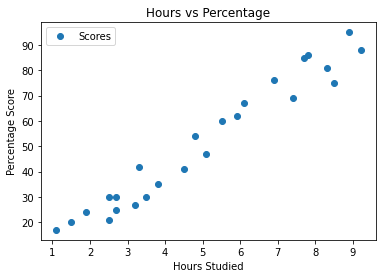

In [6]:
#Plotting and Visualing the data
df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Data Preprocessing

In [7]:
#preprocessing the data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [8]:
#splitting the dataset into training and testing.We'll do this by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42)

# Model Training

In [9]:
#We have split our data into training and testing sets, and now is finally the time to train our algorithm
#For this task, we are using simple Linear Regression model from scikit-learn library
from sklearn.linear_model import LinearRegression  
reg= LinearRegression()  
reg.fit(X_train, y_train) 
print("Training complete.")

Training complete.


# Testing the model

In [10]:
#let check the model performance on test data
y_pred = reg.predict(X_test) 
#Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


# Visualizing the regression line on the data

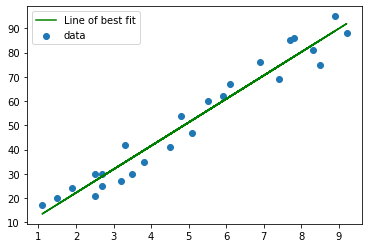

In [12]:
#Plotting the regression line 
line = reg.coef_*X+reg.intercept_
plt.scatter(X,y,label='data')
plt.plot(X, line,label='Line of best fit',color='g')
plt.legend()

In [13]:
#Accuracy of model on test data
print('Accuracy:',reg.score(X_test,y_test))
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Accuracy: 0.9678055545167994
Mean Absolute Error: 3.9207511902099244


# Making Predictions

In [14]:
#Giving real time user input
hours = float(input())
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

9.25
No of Hours = 9.25
Predicted Score = 92.38611528261494


# Comparing Actual result to the Predicted Model result

In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


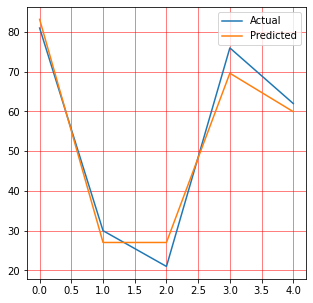

In [16]:
# Plotting the line graph to depict the difference between the actual and predicted value

df.plot(kind='line',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

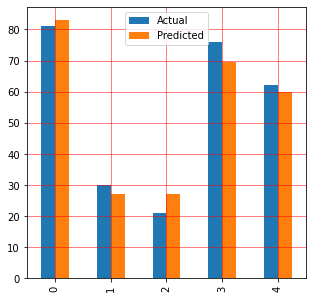

In [17]:
# Plotting the bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

# Evaluating the model

In [18]:
#Giving real time user input
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


# From the above result we can say that if a student studied for 9.25 hours/day then student can get 92.38% Marks